In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree


# New Section
**"ta_feng_all_months_merged" Dataset is used here for further analysis**

In [6]:
csv_file_name = "/content/ta_feng_all_months_merged.csv"


In [7]:
df = pd.read_csv( csv_file_name )
df.head(5)

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
0,11/1/2000,1104905,45-49,115,110411,4710199010372,2,24,30
1,11/1/2000,418683,45-49,115,120107,4710857472535,1,48,46
2,11/1/2000,1057331,35-39,115,100407,4710043654103,2,142,166
3,11/1/2000,1849332,45-49,Others,120108,4710126092129,1,32,38
4,11/1/2000,1981995,50-54,115,100205,4710176021445,1,14,18


**From this dataset we are predicting the "SALES_PRICE" column analysing through the other categorical and numerical value.**

In [8]:
target_column_name = "SALES_PRICE"

**The target value is not categorical. It is a numerical value.**

In [9]:
#categorical_target_column = True
categorical_target_column = False


In [10]:
#Find out number of rows and columns
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 817741
Total Number of Columns : 9


**As the target dataset is numerical we need to use linear regression and SVR(support vector regression) in the datasets**

Text(0.5, 1.0, 'Total Number of Null values for Each Column')

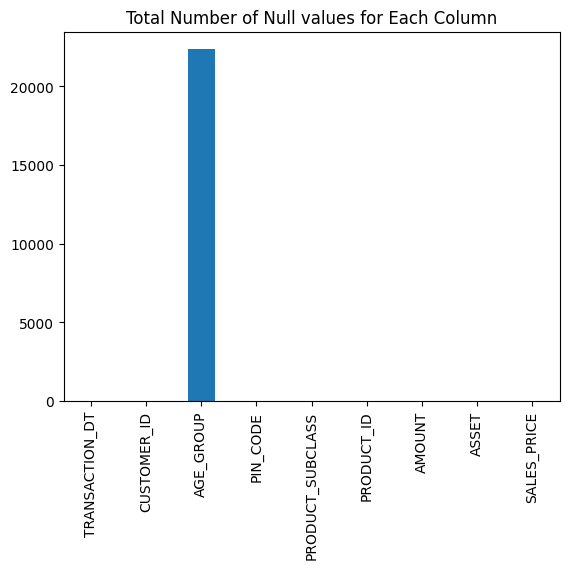

In [11]:
df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")


**A significant number of null value is present in the dataset and the column is "AGE_GROUP". These null values must be handled or deleted so that the dataset can be analysed properly**

In [12]:
#Find out the percentages of null value cout for each column
( df.isnull().sum()/len(df) ) *100


TRANSACTION_DT      0.000000
CUSTOMER_ID         0.000000
AGE_GROUP           2.734607
PIN_CODE            0.000000
PRODUCT_SUBCLASS    0.000000
PRODUCT_ID          0.000000
AMOUNT              0.000000
ASSET               0.000000
SALES_PRICE         0.000000
dtype: float64

OBSERVATION

---


Most of the data points from the column "AGE_GROUP" are missing. As **2.734607%** of the data points are missing , the column cannot be taken in consideration for further analysis.


In [13]:
droped_column_names = [ "AGE_GROUP" ]

df.drop( droped_column_names , axis = 1 ,inplace = True)

**Dropping the column**

In [14]:
# If total number of missing value is less than 5% then drop it otherwise fill using backward fill/forward fill.

print(f'Maximum Null values in column (Before Handling)  : { df.isnull().sum().max() }')

if (df.isnull().sum().max() > len(df) ) * 0.05:
  print("\n------Dropped Null Values-------\n")
  df.dropna( inplace = True)
else:
  print("\n------Replaced Null Values-------\n")
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


print(f'Maximum Null values in column (After Handling)  : { df.isnull().sum().max() }')



Maximum Null values in column (Before Handling)  : 0

------Replaced Null Values-------

Maximum Null values in column (After Handling)  : 0


In [15]:
df.dropna(inplace = True)

**Dropping all the Null values**

In [16]:
#Duplicate entry count
df.duplicated().value_counts()

print( ( df.duplicated().value_counts()/len(df) ) * 100)

False    100.0
dtype: float64


OBSERVATION

---
**There is no duplicate entries in this data set**


In [ ]:
df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817741 entries, 0 to 817740
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   TRANSACTION_DT    817741 non-null  object
 1   CUSTOMER_ID       817741 non-null  int64 
 2   PIN_CODE          817741 non-null  object
 3   PRODUCT_SUBCLASS  817741 non-null  int64 
 4   PRODUCT_ID        817741 non-null  int64 
 5   AMOUNT            817741 non-null  int64 
 6   ASSET             817741 non-null  int64 
 7   SALES_PRICE       817741 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 49.9+ MB


-----------------Unique Values per column--------------------------------




TRANSACTION_DT        120
CUSTOMER_ID         32266
PIN_CODE                8
PRODUCT_SUBCLASS     2012
PRODUCT_ID          23812
AMOUNT                 90
ASSET                1728
SALES_PRICE          2191
dtype: int64

**The targeted value is a  not categorical data**

In [ ]:
categorical_columns = ["TRANSACTION_DT" , "PIN_CODE"]
numeric_columns = [ "CUSTOMER_ID" , "PRODUCT_SUBCLASS","PRODUCT_ID", "AMOUNT", "ASSET", "SALES_PRICE"]

In [ ]:
if categorical_target_column:
  sns.pairplot( data=df , hue = target_column_name)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817741 entries, 0 to 817740
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   TRANSACTION_DT    817741 non-null  object
 1   CUSTOMER_ID       817741 non-null  int64 
 2   PIN_CODE          817741 non-null  object
 3   PRODUCT_SUBCLASS  817741 non-null  int64 
 4   PRODUCT_ID        817741 non-null  int64 
 5   AMOUNT            817741 non-null  int64 
 6   ASSET             817741 non-null  int64 
 7   SALES_PRICE       817741 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 49.9+ MB


Features and labels are stored in different variables. Categorical columns are encoded using OrdinalEncoder .

In [ ]:
X = df.drop(target_column_name , axis=1 )
y =  df[target_column_name]

enc = OrdinalEncoder()
X = enc.fit_transform( X )


le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [ ]:
droped_column_names = [ "TRANSACTION_DT" ]

df.drop( droped_column_names , axis = 1 ,inplace = True)

Dropping the "TRANSACTION_DT"

In [ ]:
df

,CUSTOMER_ID,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
0,1104905,115,110411,4710199010372,2,24,30
1,418683,115,120107,4710857472535,1,48,46
2,1057331,115,100407,4710043654103,2,142,166
3,1849332,Others,120108,4710126092129,1,32,38
4,1981995,115,100205,4710176021445,1,14,18
...,...,...,...,...,...,...,...
817736,312790,114,530501,4713317035042,2,80,118
817737,57486,115,530209,4710731060124,1,40,55
817738,733526,Unknown,510539,4716340052307,1,78,115
817739,173704,115,520457,4714276145315,1,90,96


In [ ]:
enc = LabelEncoder()
df["PIN_CODE"] = enc.fit_transform( df["PIN_CODE"] )


**Here the pincode has a cell name "others" which was creating problem in linear regression.So it is label encoded**

In [ ]:
X = df.drop(["SALES_PRICE"]  , axis =1)
y= df["SALES_PRICE"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)


1768.3027348576052

The mean squared error (MSE) value of 1768.3027348576052 measures the average squared difference between predicted and actual values. Lower MSE indicates better model performance, with units squared based on the target variable.

In [ ]:
X = df.iloc[:5000].drop(["SALES_PRICE"]  , axis =1)
y= df.iloc[:5000]["SALES_PRICE"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVR
regr  =  SVR()
regr.fit( X_train , y_train)
y_pred =  regr.predict( X_test )
print(mean_squared_error(y_test, y_pred))


12783.204149289186 The mean squared error (MSE) value from the Support Vector Regression model indicates the average squared difference between predicted and actual values. Lower MSE implies better model performance.